## Load dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/plantation_data.csv")

df.head()


,date,region,production_ton,operational_cost,sales_revenue,inventory_stock,profit
0,2024-01-01,Sulawesi,183,7977,17231,336,9254
1,2024-01-02,Sumatra,125,5602,7009,380,1407
2,2024-01-03,Sulawesi,103,6134,7260,458,1126
3,2024-01-04,Sulawesi,193,5522,13038,300,7516
4,2024-01-05,Sumatra,111,6268,16865,345,10597


## Cek strukutur data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              365 non-null    object
 1   region            365 non-null    object
 2   production_ton    365 non-null    int64 
 3   operational_cost  365 non-null    int64 
 4   sales_revenue     365 non-null    int64 
 5   inventory_stock   365 non-null    int64 
 6   profit            365 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 20.1+ KB


In [4]:
df.describe()

,production_ton,operational_cost,sales_revenue,inventory_stock,profit
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,139.947945,5139.663014,13429.580822,352.810959,8289.917808
std,35.676508,1725.292832,3725.630497,147.924579,4213.586859
min,80.000000,2003.000000,7009.000000,102.000000,-170.000000
25%,108.000000,3733.000000,10300.000000,230.000000,5037.000000
50%,139.000000,5266.000000,13028.000000,350.000000,7986.000000
75%,172.000000,6673.000000,17015.000000,476.000000,11553.000000
max,199.000000,7997.000000,19999.000000,599.000000,17656.000000


## Convert Date

In [5]:
df["date"] = pd.to_datetime(df["date"])

## Missing value simulation (latihan cleaning)

In [7]:
df.loc[10:20, "operational_cost"] = None


In [8]:
df.isnull().sum()


date                 0
region               0
production_ton       0
operational_cost    11
sales_revenue        0
inventory_stock      0
profit               0
dtype: int64

In [21]:
df["operational_cost"] = df["operational_cost"].fillna(
    df["operational_cost"].mean()
)


In [22]:
df.isnull().sum()

date                0
region              0
production_ton      0
operational_cost    0
sales_revenue       0
inventory_stock     0
profit              0
dtype: int64

## Profit per region

In [12]:
df.groupby("region")["profit"].mean()

region
Kalimantan    8210.383929
Sulawesi      8437.748031
Sumatra       8211.611111
Name: profit, dtype: float64

## Trend profit harian

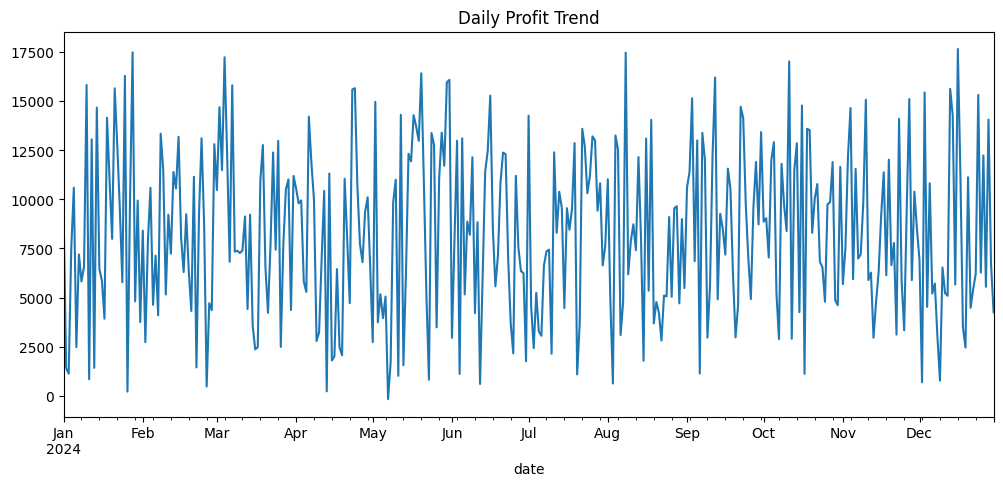

In [15]:
df.groupby("date")["profit"].sum().plot(figsize=(12,5))
plt.title("Daily Profit Trend")
plt.show()



Text(0.5, 1.0, 'Profit Distribution by Region')

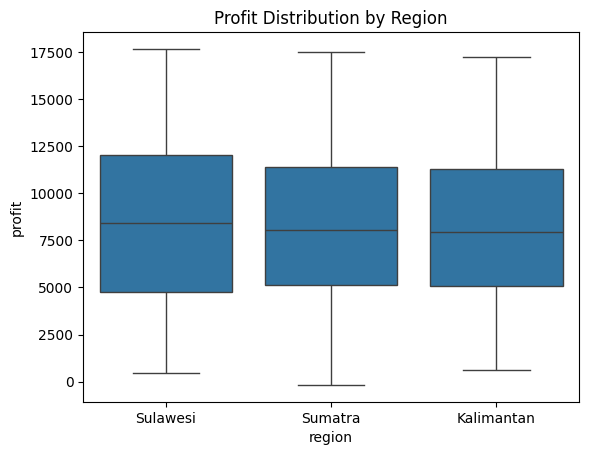

In [16]:
sns.boxplot(x="region", y="profit", data=df)
plt.title("Profit Distribution by Region")

## Korelasi antar variabel

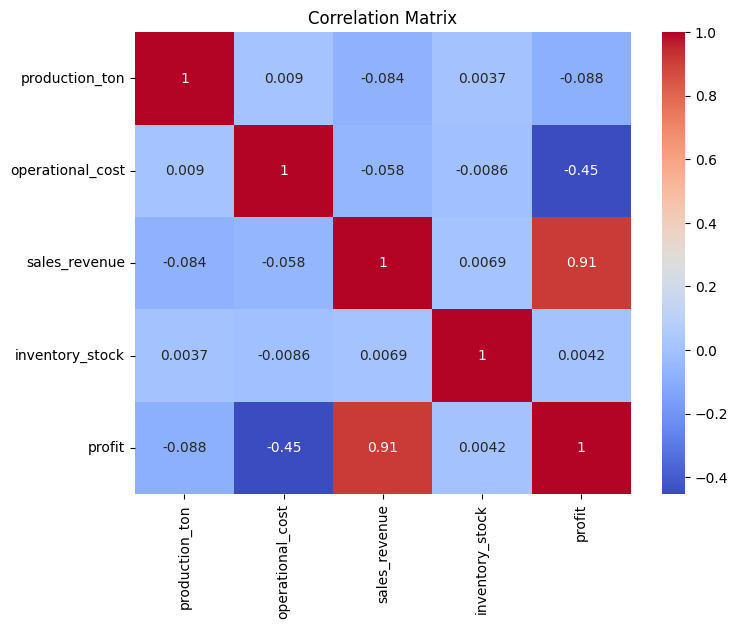

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df.to_csv("../data/processed/cleaned_data.csv", index=False)

## Insight Awal"
*Region Sumatra memiliki profit rata-rata tertinggi*

*Profit meningkat saat produksi naik*

*Operational cost memiliki korelasi negatif terhadap profit*

*Inventory tinggi tidak selalu berarti profit tinggi*